<a href="https://colab.research.google.com/github/hellfer/Kaggle/blob/main/House_Regression_Beginner_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

house_prices_advanced_regression_techniques_path = kagglehub.competition_download('house-prices-advanced-regression-techniques')
leejeongju22_ameshousing_csv_path = kagglehub.dataset_download('leejeongju22/ameshousing-csv')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ameshousing-csv/AmesHousing.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, norm
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

import xgboost as xgb
from catboost import Pool
from catboost import CatBoostRegressor

import missingno as msno

%matplotlib inline

In [ ]:
train = pd.read_csv('/kaggle/input/ameshousing-csv/AmesHousing.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
train.columns = train.columns.str.replace(' ', '')
train = train.drop(['Order','PID'], axis = 1)
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [ ]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
test.drop(['Id'], axis=1, inplace=True)
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
train_test = pd.concat([train, test], axis=0, ignore_index=True)
train_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearRemodAdd
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000.0,NaN
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000.0,NaN
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000.0,NaN
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000.0,NaN
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4384,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,1970.0
4385,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,1970.0
4386,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,1996.0
4387,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,1992.0


<Axes: >

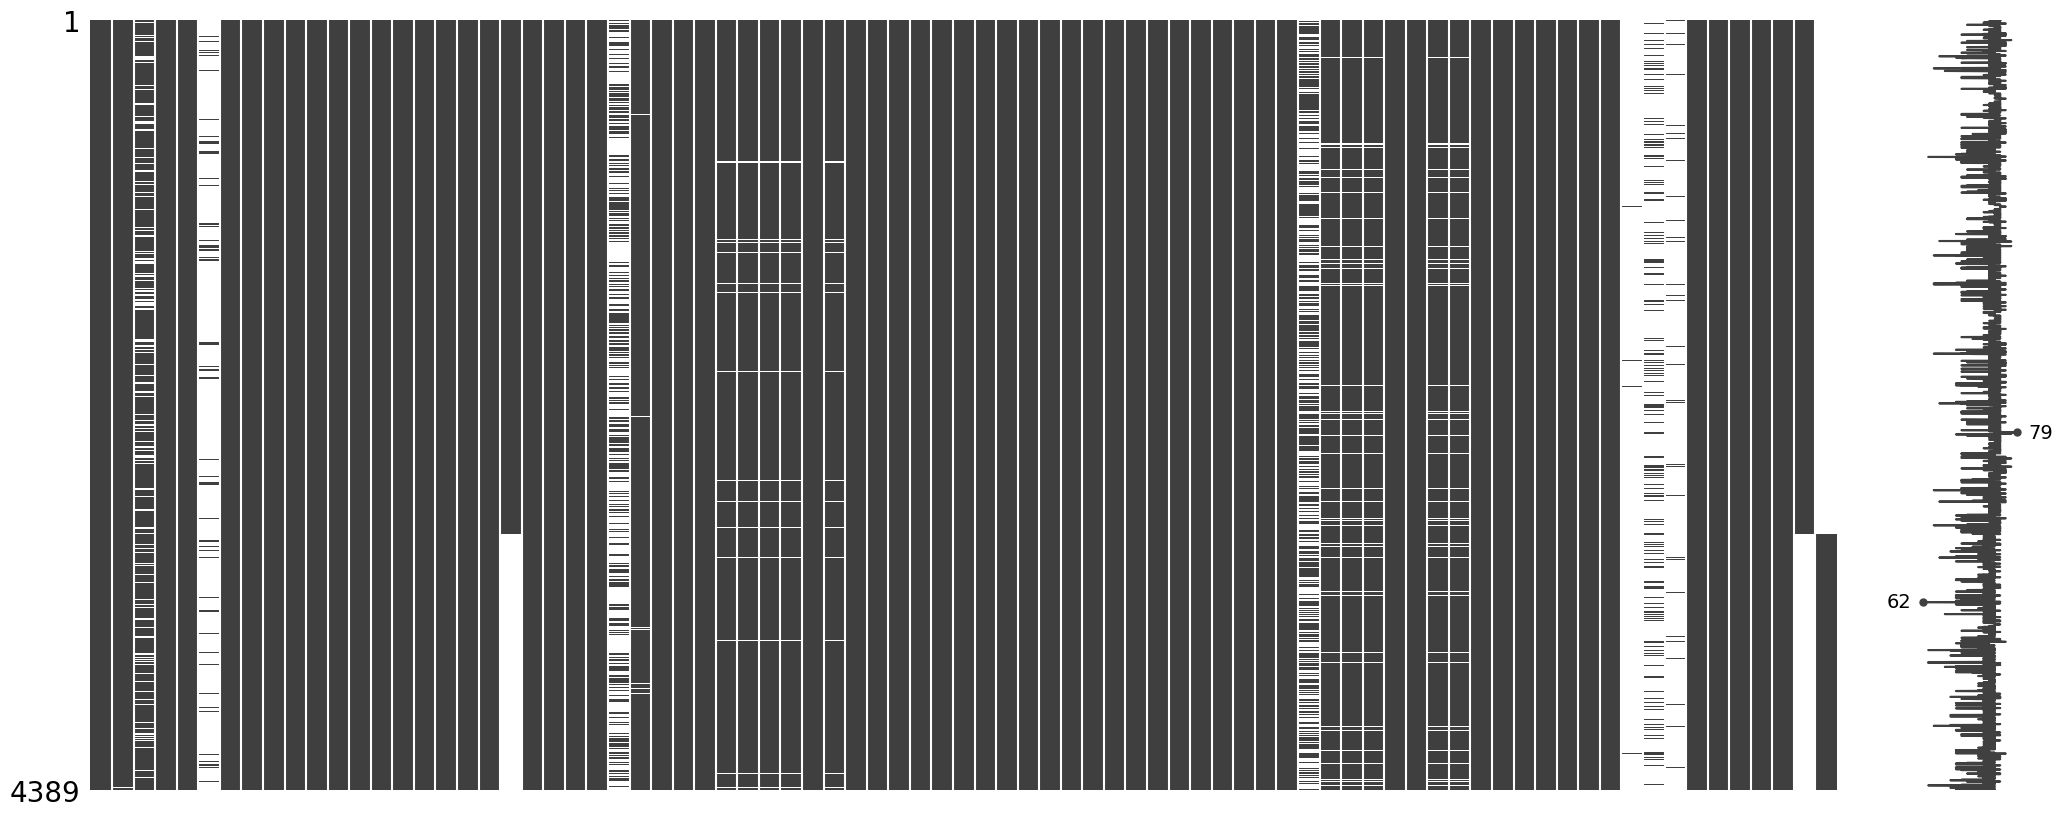

In [ ]:
msno.matrix(train_test)

In [ ]:
numerical_features = train_test.select_dtypes(include = [int, float]).columns.tolist()
categorical_features = train_test.select_dtypes(include = 'object').columns.tolist()

/tmp/ipykernel_33/1898179435.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], kde=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

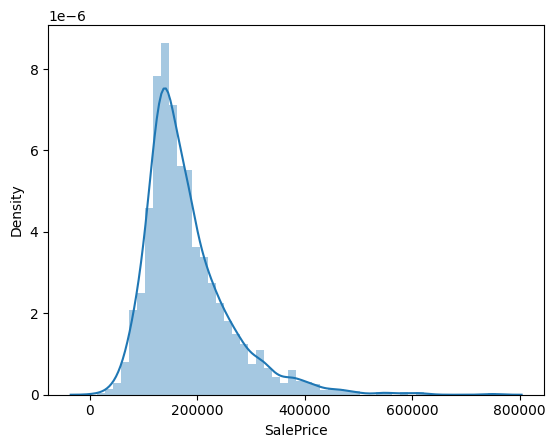

In [ ]:
sns.distplot(train['SalePrice'], kde=True)

<Axes: >

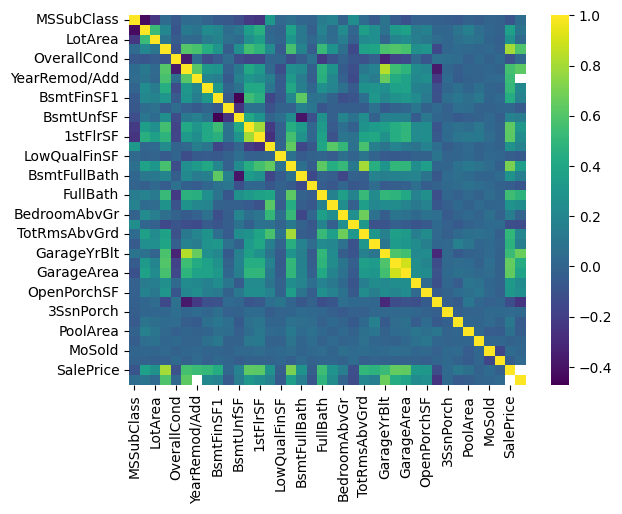

In [ ]:
corr = train_test.select_dtypes(include=['number']).corr()
sns.heatmap(corr, cmap='viridis')

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemod/Add'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedro

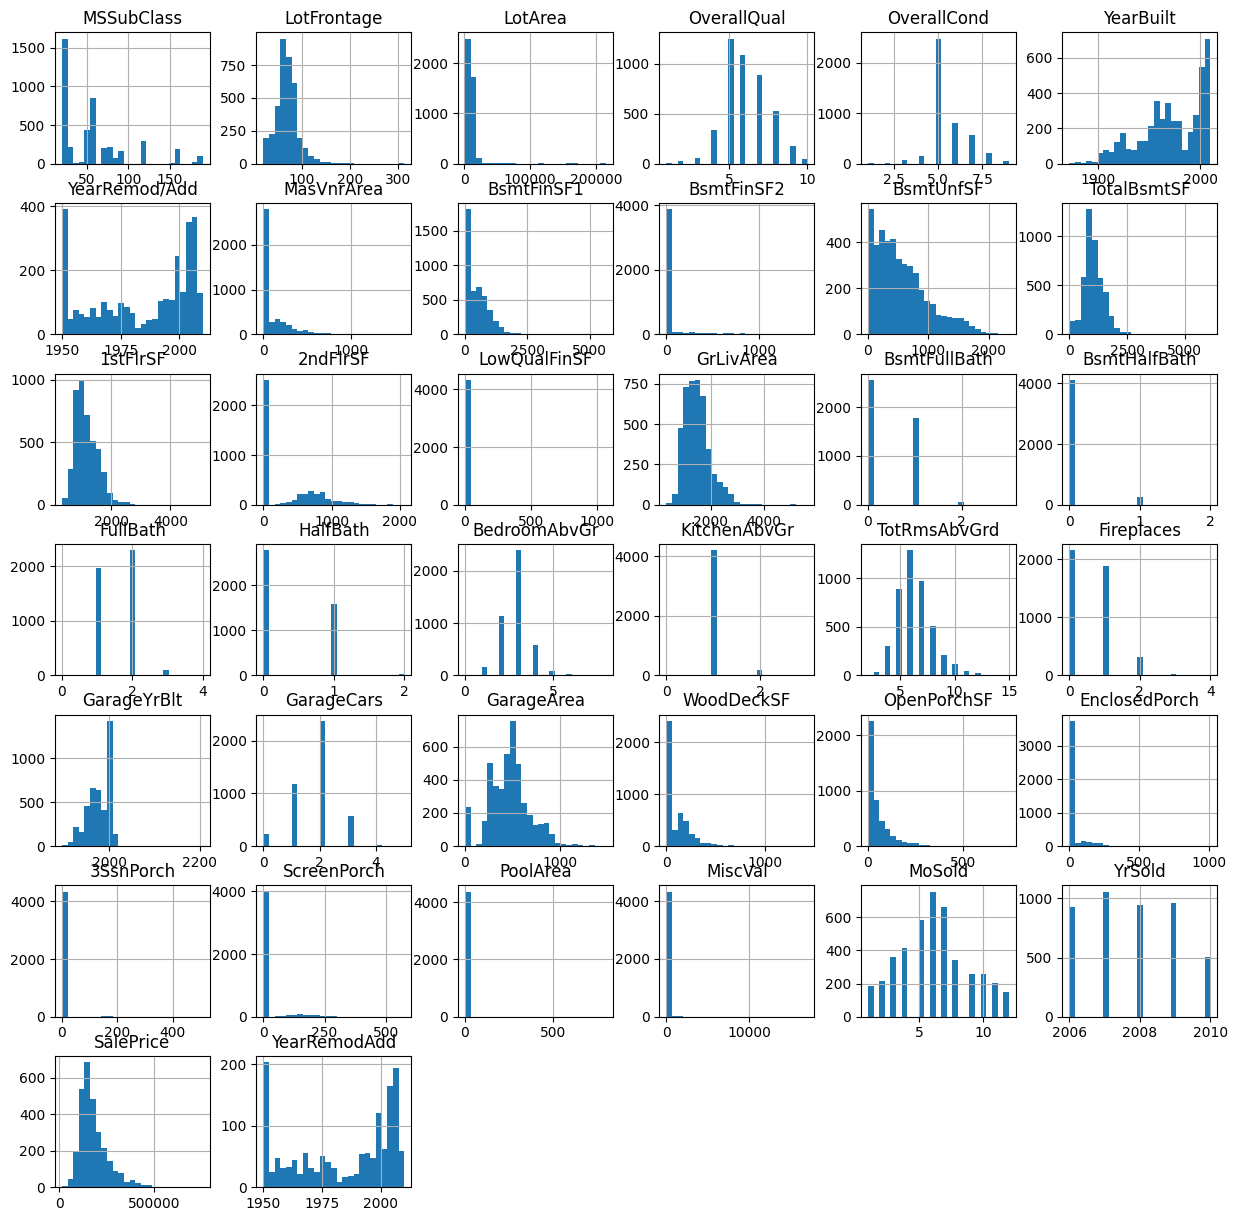

In [ ]:
train_test[numerical_features].hist(bins=25, figsize=(15,15))

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3

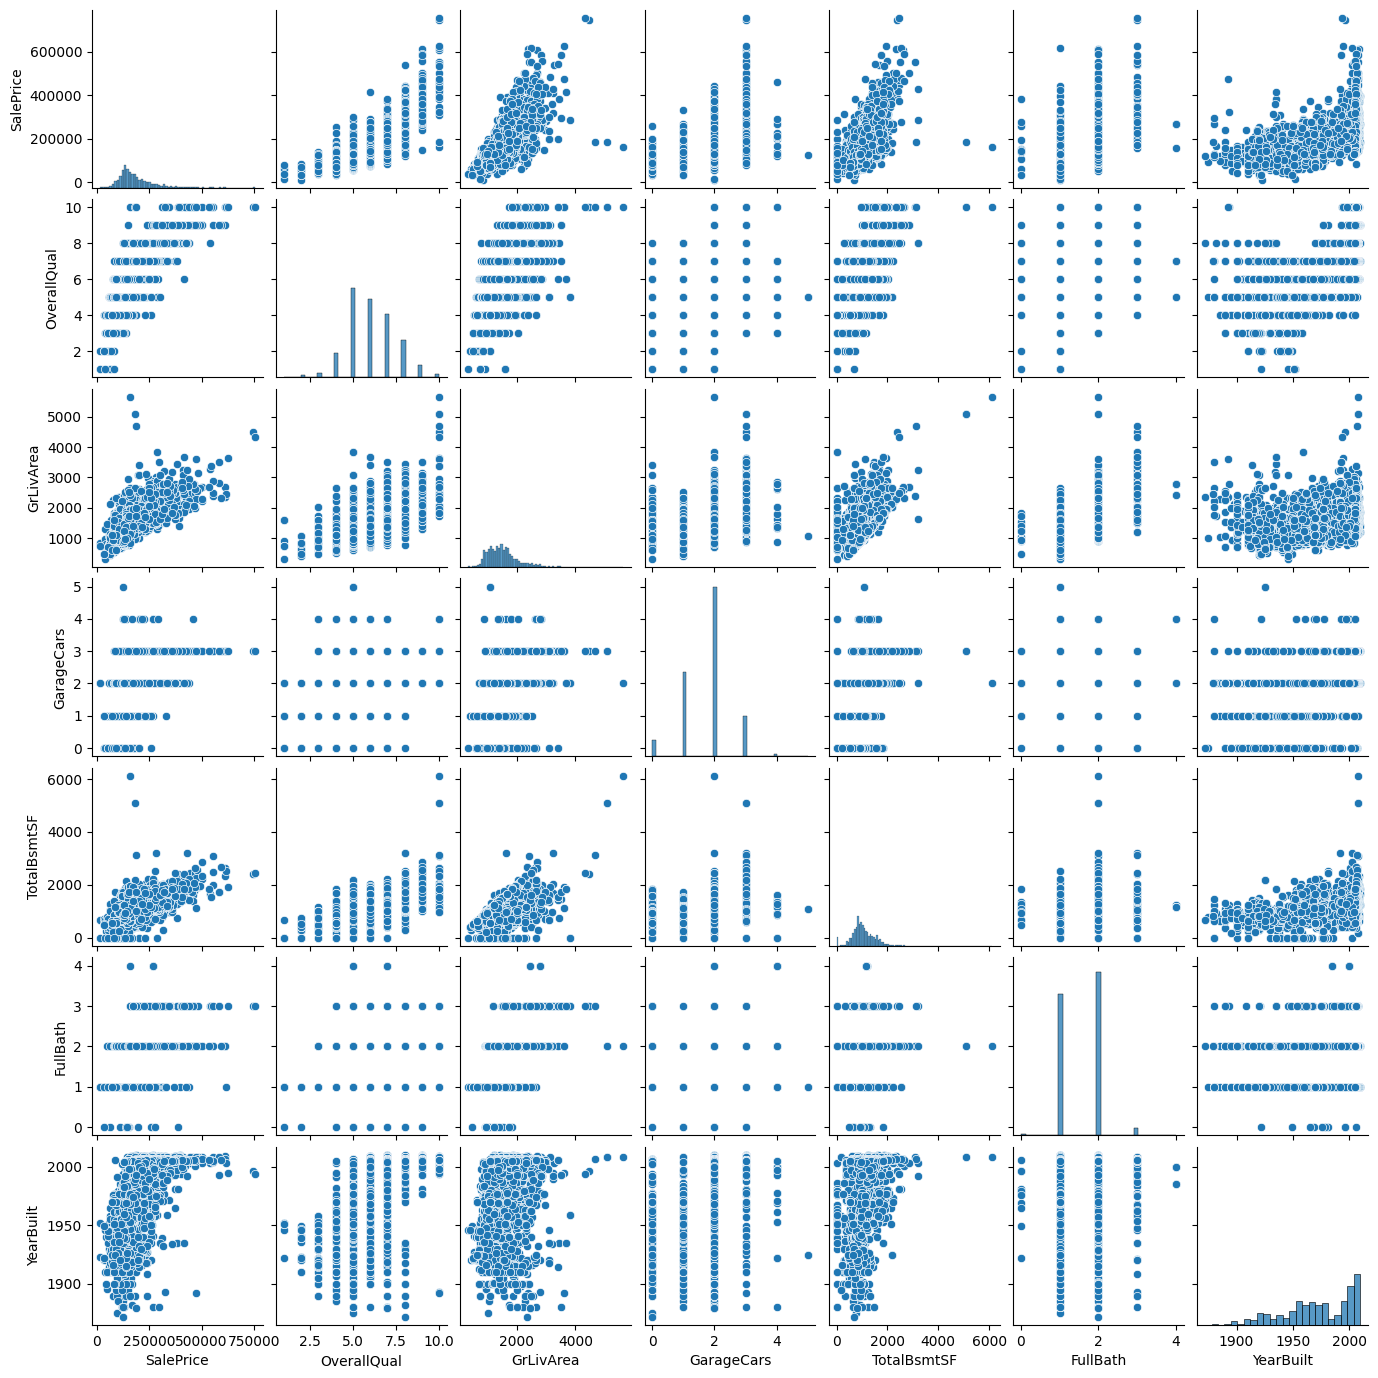

In [ ]:
selected_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data=train_test[selected_features], size=2)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

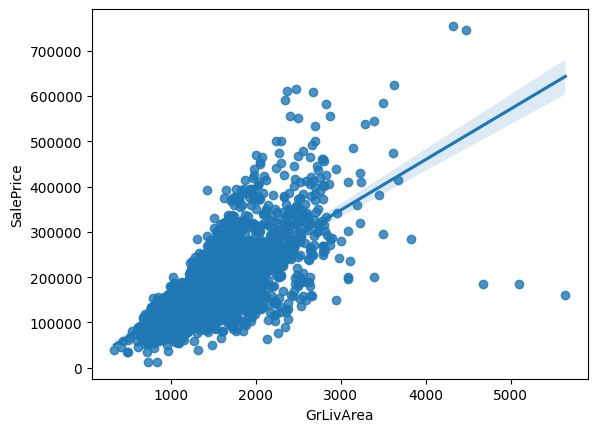

In [ ]:
sns.regplot(data=train_test, x='GrLivArea', y='SalePrice')

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

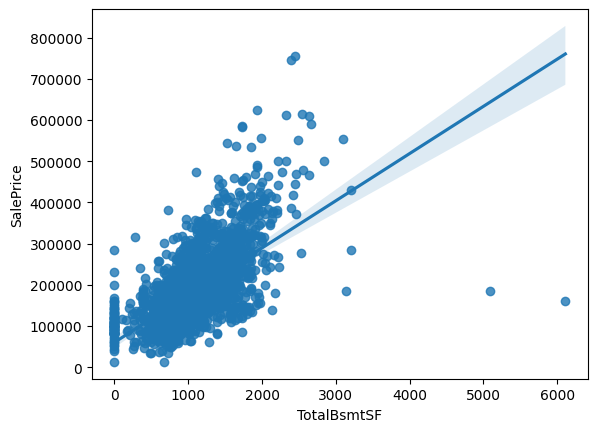

In [ ]:
sns.regplot(data=train_test, x='TotalBsmtSF', y='SalePrice')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

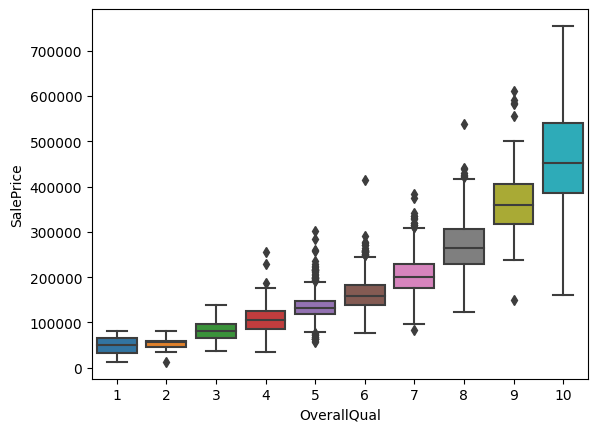

In [ ]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train_test)

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

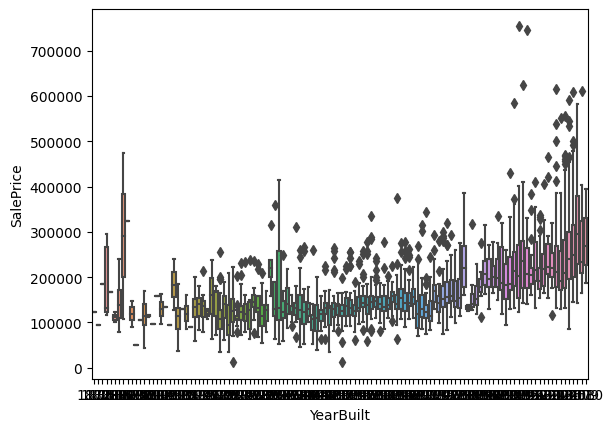

In [ ]:
sns.boxplot(x='YearBuilt', y='SalePrice', data=train_test)

In [ ]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4389 entries, 0 to 4388
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     4389 non-null   int64  
 1   MSZoning       4385 non-null   object 
 2   LotFrontage    3672 non-null   float64
 3   LotArea        4389 non-null   int64  
 4   Street         4389 non-null   object 
 5   Alley          305 non-null    object 
 6   LotShape       4389 non-null   object 
 7   LandContour    4389 non-null   object 
 8   Utilities      4387 non-null   object 
 9   LotConfig      4389 non-null   object 
 10  LandSlope      4389 non-null   object 
 11  Neighborhood   4389 non-null   object 
 12  Condition1     4389 non-null   object 
 13  Condition2     4389 non-null   object 
 14  BldgType       4389 non-null   object 
 15  HouseStyle     4389 non-null   object 
 16  OverallQual    4389 non-null   int64  
 17  OverallCond    4389 non-null   int64  
 18  YearBuil

In [ ]:
train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

In [ ]:
train_test['Functional'] = train_test['Functional'].fillna('Typ')
train_test['Electrical'] = train_test['Electrical'].fillna("SBrkr")
train_test['KitchenQual'] = train_test['KitchenQual'].fillna("TA")
train_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])
train_test['Exterior2nd'] = train_test['Exterior2nd'].fillna(train_test['Exterior2nd'].mode()[0])
train_test['SaleType'] = train_test['SaleType'].fillna(train_test['SaleType'].mode()[0])
train_test["PoolQC"] = train_test["PoolQC"].fillna("None")
train_test["Alley"] = train_test["Alley"].fillna("None")
train_test['FireplaceQu'] = train_test['FireplaceQu'].fillna("None")
train_test['Fence'] = train_test['Fence'].fillna("None")
train_test['MiscFeature'] = train_test['MiscFeature'].fillna("None")

for col in ('GarageArea', 'GarageCars'):
    train_test[col] = train_test[col].fillna(0)

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_test[col] = train_test[col].fillna('None')

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test[col] = train_test[col].fillna('None')

In [ ]:
useless = ['GarageYrBlt', 'YearRemodAdd']
train_test.drop(useless, axis=1, inplace=True)

In [ ]:
missing_value = train_test.isnull().sum()
columns_with_missing = missing_value[missing_value > 0].index.tolist()
columns_with_missing = [col for col in columns_with_missing if train_test[col].isnull().any()]

print('Columns with missing values:', columns_with_missing)

Columns with missing values: ['MSZoning', 'LotFrontage', 'Utilities', 'YearRemod/Add', 'MasVnrType', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'SalePrice']


In [ ]:
def impute_knn(df):
    ttn = train_test.select_dtypes(include=[np.number])
    ttc = train_test.select_dtypes(exclude=[np.number])

    cols_nan = ttn.columns[ttn.isna().any()].tolist()
    cols_no_nan = ttn.columns.difference(cols_nan).values

    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]
        imp_train = ttn.dropna()
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])

    return pd.concat([ttn, ttc],axis=1)

train_test = impute_knn(train_test)

In [ ]:
objects = []
for i in train_test.columns:
    if train_test[i].dtype == object:
        objects.append(i)

train_test.update(train_test[objects].fillna('None'))
train_test[columns_with_missing].isna().sum()

MSZoning         0
LotFrontage      0
Utilities        0
YearRemod/Add    0
MasVnrType       0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
SalePrice        0
dtype: int64

In [ ]:
train_test["SqFtPerRoom"] = train_test["GrLivArea"] / (train_test["TotRmsAbvGrd"] +
                                                       train_test["FullBath"] +
                                                       train_test["HalfBath"] +
                                                       train_test["KitchenAbvGr"])

train_test['Total_Home_Quality'] = train_test['OverallQual'] + train_test['OverallCond']

train_test['Total_Bathrooms'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) +
                               train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

train_test["HighQualSF"] = train_test["GrLivArea"] + train_test["1stFlrSF"] + train_test["2ndFlrSF"] + 0.5 * train_test["GarageArea"] + 0.5 * train_test["TotalBsmtSF"] + 1 * train_test["MasVnrArea"]

train_test["Age"] = pd.to_numeric(train_test["YrSold"]) - pd.to_numeric(train_test["YearBuilt"])

train_test["Renovate"] = pd.to_numeric(train_test["YearRemod/Add"]) - pd.to_numeric(train_test["YearBuilt"])

In [ ]:
train_test_dummy = pd.get_dummies(train_test)
train_test_dummy

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,141.0,31770,6,5,1960,1960.0,112.0,639.0,0.0,441.0,...,False,False,False,True,False,False,False,False,True,False
1,80.0,11622,5,6,1961,1961.0,0.0,468.0,144.0,270.0,...,False,False,False,True,False,False,False,False,True,False
2,81.0,14267,6,6,1958,1958.0,108.0,923.0,0.0,406.0,...,False,False,False,True,False,False,False,False,True,False
3,93.0,11160,7,5,1968,1968.0,0.0,1065.0,0.0,1045.0,...,False,False,False,True,False,False,False,False,True,False
4,74.0,13830,5,5,1997,1998.0,0.0,791.0,0.0,137.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4384,21.0,1936,4,7,1970,1971.6,0.0,0.0,0.0,546.0,...,False,False,True,False,False,False,False,False,True,False
4385,21.0,1894,4,5,1970,1972.0,0.0,252.0,0.0,294.0,...,False,False,True,False,True,False,False,False,False,False
4386,160.0,20000,5,7,1960,1985.2,0.0,1224.0,0.0,0.0,...,False,False,True,False,True,False,False,False,False,False
4387,62.0,10441,5,5,1992,1984.8,0.0,337.0,0.0,575.0,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
numeric_features = train_test_dummy.dtypes[train_test_dummy.dtypes != object].index
skewed_features = train_test_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i])

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


/tmp/ipykernel_33/15374125.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_log, kde=True, hist=True, fit=norm, ax=ax[1])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


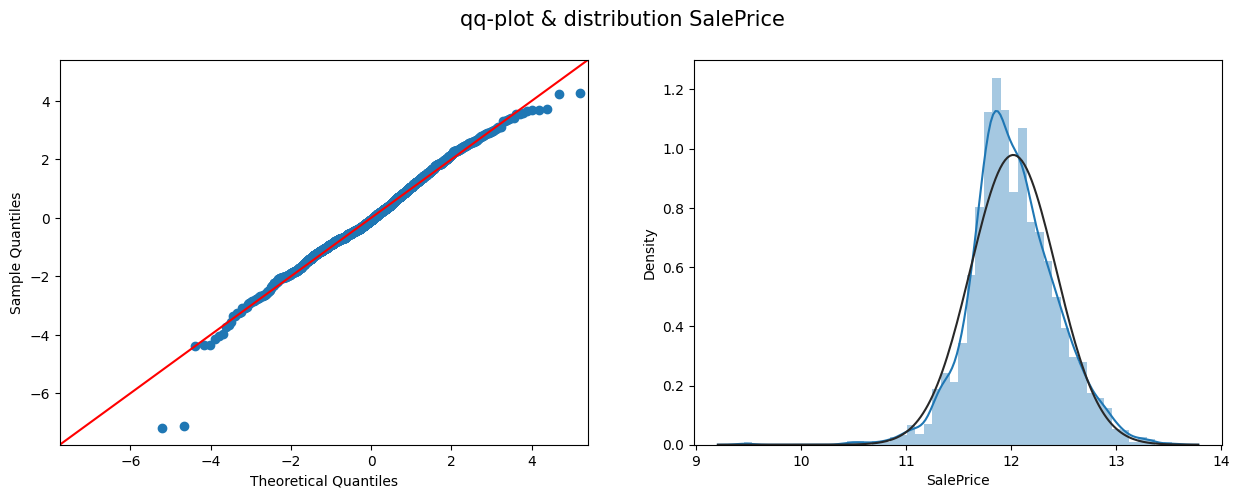

In [ ]:
target = train['SalePrice']
target_log = np.log1p(target)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('qq-plot & distribution SalePrice', fontsize=15)

sm.qqplot(target_log, stats.t, distargs=(4,), fit=True, line='45', ax=ax[0])
sns.distplot(target_log, kde=True, hist=True, fit=norm, ax=ax[1])
plt.show()

/tmp/ipykernel_33/2717587216.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(HighQualSF_log, kde=True, hist=True, fit=norm, ax=ax[1])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


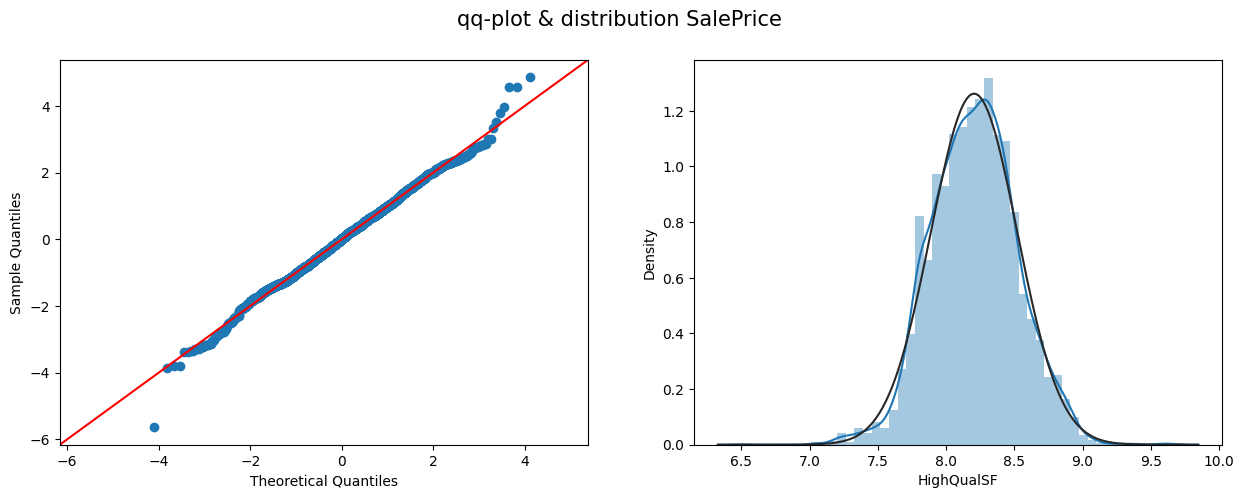

In [ ]:
HighQualSF_log = np.log1p(train_test["HighQualSF"])

fig, ax = plt.subplots(1, 2, figsize= (15, 5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize=15)

sm.qqplot(HighQualSF_log, stats.t, distargs=(4,), fit=True, line="45", ax=ax[0])
sns.distplot(HighQualSF_log, kde=True, hist=True, fit=norm, ax=ax[1])
plt.show()

train_test["HighQualSF"] = HighQualSF_log

/tmp/ipykernel_33/1936003303.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(GrLivArea_log, kde=True, hist=True, fit = norm, ax=ax[1])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


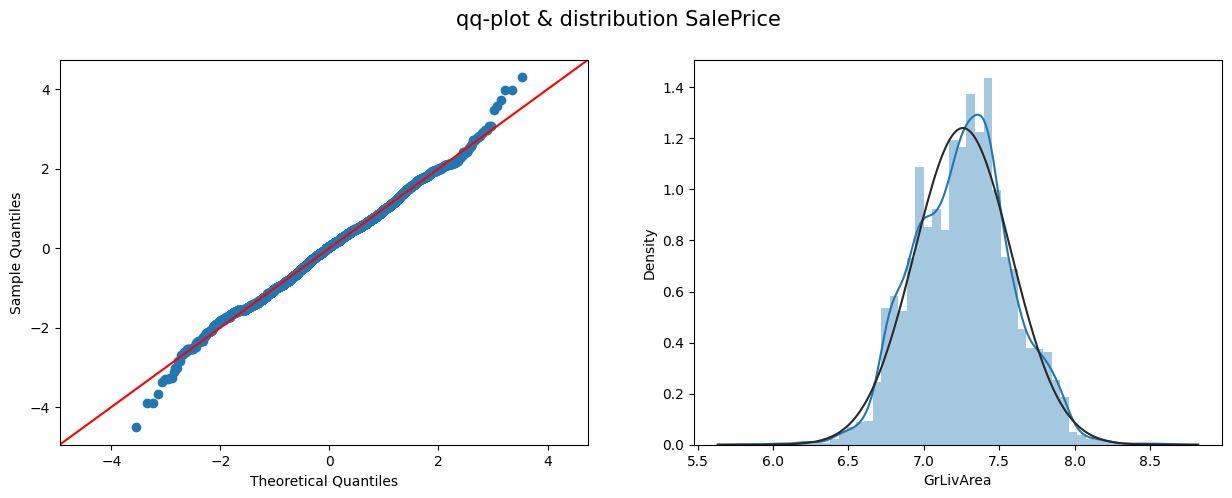

In [ ]:
GrLivArea_log = np.log1p(train_test["GrLivArea"])

fig, ax = plt.subplots(1, 2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize=15)

sm.qqplot(GrLivArea_log, stats.t, distargs=(4,), fit=True, line="45", ax=ax[0])
sns.distplot(GrLivArea_log, kde=True, hist=True, fit = norm, ax=ax[1])
plt.show()

train_test["GrLivArea"]= GrLivArea_log

In [ ]:
train = train_test_dummy[0:2930]
test = train_test_dummy[2930:]
test.drop('SalePrice', axis=1, inplace=True)

/tmp/ipykernel_33/1158047488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('SalePrice', axis=1, inplace=True)


In [ ]:
ytrain = target_log
xtrain = train.drop('SalePrice', axis=1)

X_train, X_val, y_train, y_val = train_test_split(xtrain, ytrain, test_size=0.5, random_state=42 )
X_train, y_train = xtrain, ytrain
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.955827,10.366309,6,1.791759,1960,1960.0,4.727388,6.461468,0.000000,6.091310,...,0.0,0.0,0.0,True,0.0,0.0,0.0,0.0,True,0.0
1,4.394449,9.360741,5,1.945910,1961,1961.0,0.000000,6.150603,4.976734,5.602119,...,0.0,0.0,0.0,True,0.0,0.0,0.0,0.0,True,0.0
2,4.406719,9.565775,6,1.945910,1958,1958.0,4.691348,6.828712,0.000000,6.008813,...,0.0,0.0,0.0,True,0.0,0.0,0.0,0.0,True,0.0
3,4.543295,9.320181,7,1.791759,1968,1968.0,0.000000,6.971669,0.000000,6.952729,...,0.0,0.0,0.0,True,0.0,0.0,0.0,0.0,True,0.0
4,4.317488,9.534668,5,1.791759,1997,1998.0,0.000000,6.674561,0.000000,4.927254,...,0.0,0.0,0.0,True,0.0,0.0,0.0,0.0,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,3.637586,8.979417,6,1.945910,1984,1984.0,0.000000,6.709304,0.000000,5.220356,...,0.0,0.0,0.0,True,0.0,0.0,0.0,0.0,True,0.0
2926,4.189655,9.092232,5,1.791759,1983,1983.0,0.000000,5.710427,5.783825,5.480639,...,0.0,0.0,0.0,True,0.0,0.0,0.0,0.0,True,0.0
2927,4.143135,9.253591,5,1.791759,1992,1992.0,0.000000,5.823046,0.000000,6.356108,...,0.0,0.0,0.0,True,0.0,0.0,0.0,0.0,True,0.0
2928,4.356709,9.211440,5,1.791759,1974,1975.0,0.000000,6.977281,4.820282,5.278115,...,0.0,0.0,0.0,True,0.0,0.0,0.0,0.0,True,0.0


In [ ]:
X_val

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1357,4.036009,8.537192,8,2.079442,1925,1996.0,0.000000,0.000000,0.000000,6.378426,...,0.0,0.0,0.0,True,0.000000,0.0,0.0,0.0,True,0.000000
2367,3.091042,7.544861,6,2.079442,1972,1972.0,5.942799,5.645447,0.000000,5.361292,...,0.0,0.0,0.0,True,0.000000,0.0,0.0,0.0,True,0.000000
2822,4.143135,8.876684,7,1.791759,2003,2004.0,5.252273,0.000000,0.000000,6.680855,...,0.0,0.0,0.0,True,0.000000,0.0,0.0,0.0,True,0.000000
2126,4.110874,8.996033,4,1.791759,1994,1995.0,0.000000,6.378426,0.000000,5.998937,...,0.0,0.0,0.0,True,0.000000,0.0,0.0,0.0,True,0.000000
1544,3.931826,8.853808,6,2.197225,1926,1998.0,0.000000,5.703782,3.713572,6.320768,...,0.0,0.0,0.0,True,0.000000,0.0,0.0,0.0,True,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,4.709530,9.643291,7,1.791759,1981,1981.0,0.000000,4.804021,0.000000,7.390181,...,0.0,0.0,0.0,True,0.000000,0.0,0.0,0.0,True,0.000000
2243,4.189655,8.789660,4,1.945910,1957,1980.0,0.000000,6.875232,0.000000,4.672829,...,0.0,0.0,0.0,True,0.693359,0.0,0.0,0.0,False,0.000000
339,4.343805,9.199583,8,1.791759,1994,1995.0,0.000000,7.201916,5.652489,4.007333,...,0.0,0.0,0.0,True,0.000000,0.0,0.0,0.0,True,0.000000
2498,4.615121,9.570180,7,1.609438,1974,1974.0,4.983607,6.931472,6.210600,5.433722,...,0.0,0.0,0.0,True,0.000000,0.0,0.0,0.0,True,0.000000


In [ ]:
final_model = CatBoostRegressor(random_seed=42)

In [ ]:
final_model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)

In [ ]:
final_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': True,
 'random_seed': 42,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'lear

In [ ]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
final_pred = final_model.predict(X_val)

In [ ]:
final_score = rmse(y_val, final_pred)
final_score

0.04005029112771279

In [ ]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
test_pred = np.expm1(final_model.predict(test))

In [ ]:
submission['SalePrice'] = test_pred
submission

,Id,SalePrice
0,1461,113691.210614
1,1462,169613.112540
2,1463,186359.167551
3,1464,199043.151927
4,1465,190748.701005
...,...,...
1454,2915,87181.732344
1455,2916,76557.227880
1456,2917,133187.448525
1457,2918,128191.769787


In [ ]:
submission.to_csv("submission.csv", index=False, header=True)